In [1]:
import cv2
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

### PROBLEMA 1

In [22]:
#funcion que recibe imagen y un color entero y regresa imagen con con canal indicado
def modificaCanal(img,color):
    print(color)    
    # print(img)
    #obteniendo dimensiones de la imagen
    alto=img.shape[0]
    ancho=img.shape[1]
    # se hace una copia para no alterar la original
    img_salida = np.zeros_like(img) #imagen de salida  me da todos los pixeles pero apagados es decir todos negros
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=img[i,j]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            if color==1:
                img_salida[i,j]=[blue,0,0]   #activa solo los azules
            elif color==2:
                img_salida[i,j]=[0,green,0]
            elif color==3:
                img_salida[i,j]=[0,0,red]
            elif color==10:
                img_salida[i,j]=[0,green,red]
            elif color==20:
                img_salida[i,j]=[blue,green,0]
            elif color==30:
                img_salida[i,j]=[blue,0,red]
            else:
                print("Error: debe ingresar codigos de color= 1, 2, 3, 10, 20 o 30.")
                return img #regreso la imagen sin ningun cambio
    return img_salida

20


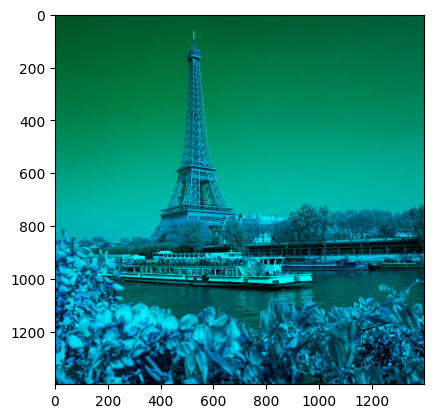

In [29]:
#probando funcion de modificaCanal
img=cv2.imread("paris.jpg")
imgCambiada=modificaCanal(img,20)
imgCambiada=cv2.cvtColor(imgCambiada,cv2.COLOR_BGR2RGB)
plt.imshow(imgCambiada)
plt.show()


### PROBLEMA 2

In [71]:
def unificarColores(imagen1, imagen2, imagen3):
    
    # Creamos una imagen en color vacía con las mismas dimensiones que las imágenes en escala de grises
    alto=imagen1.shape[0]
    ancho=imagen1.shape[1]
    color_image = np.zeros((alto, ancho, 3), dtype=np.uint8)
    
    # Asignar cada imagen de escala de grises a su respectivo canal de color
    # investigando este codigo es en lugar del for que se hizo en el problema 1
    color_image[:, :, 0] = imagen3  # Canal azul
    color_image[:, :, 1] = imagen2  # Canal verde
    color_image[:, :, 2] = imagen1  # Canal rojo
    
    return color_image

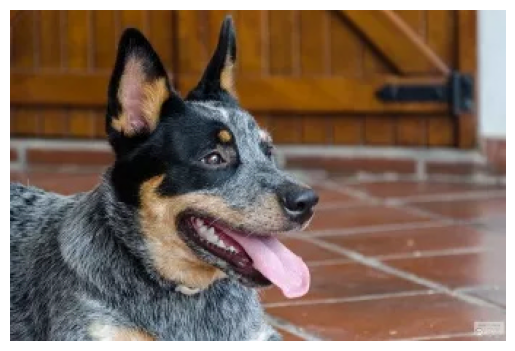

In [73]:
# probando la funcion de unificacion de imagenes
# Cargar las imágenes en escala de grises
imagen1 = cv2.imread("perro/perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread("perro/perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imagen3 = cv2.imread("perro/perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)
# Reconstruir la imagen a color
imagen_color = unificarColores(imagen1, imagen2, imagen3)

# Verificar si la imagen a color fue creada correctamente
if imagen_color is not None:
    # Convertir la imagen de BGR a RGB para mostrarla correctamente con matplotlib
    imagen_color_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen a color
    plt.imshow(imagen_color_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Error: No se pudo reconstruir la imagen a color.")

### PROBLEMA 3

In [69]:
def escalaGrises(img):
    # Extraemos los canales decada color
    # la funcion split de open cv me devuelve 3 matrices independientes de cada canal de color.
    azul, verde, rojo = cv2.split(img) # lo recupero en bgr porque opencv asi los devuelve en la funcion split
    return rojo, verde, azul  # pero lo mando en rgb 

Text(0.5, 1.0, 'Gris-azul')

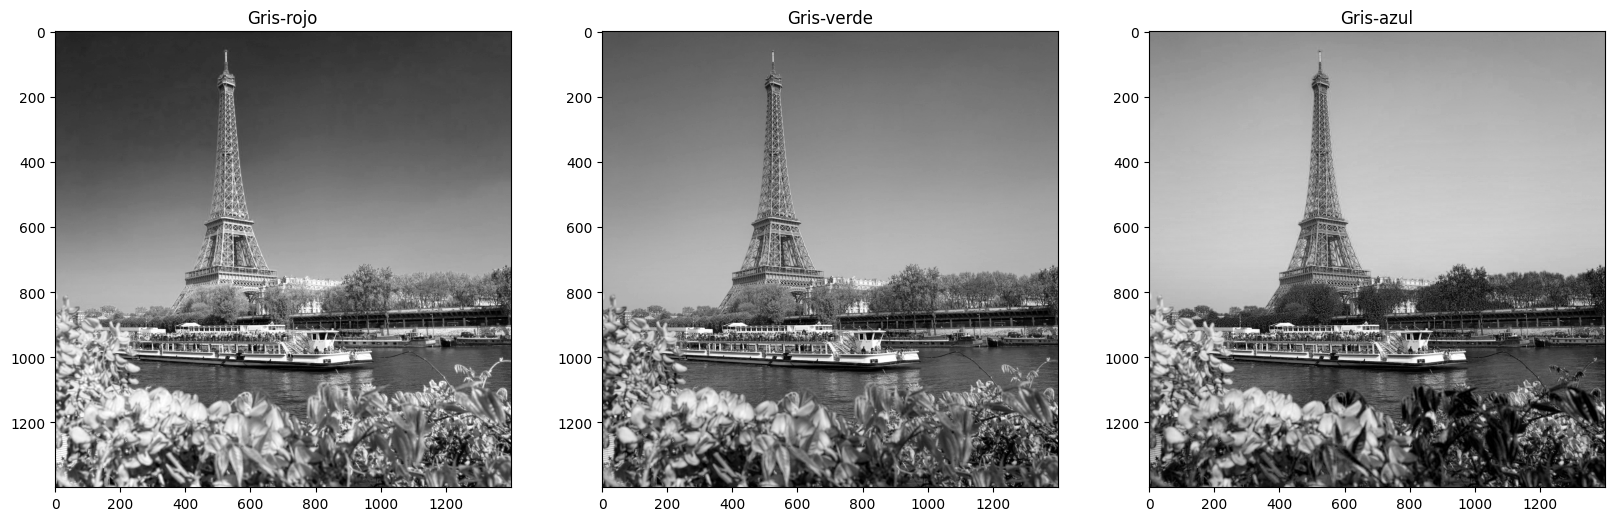

In [99]:
# Ejemplo de uso
#cargo la imagen de color
img = cv2.imread("paris.jpg")

# Crear las imágenes en escala de grises en 3D
imgRojo, imgVerde, imgAzul= escalaGrises(img)



#usamos subplots de 1 fila y 3 columnas para podee poner las 3 imagenes en horizontal en la salida
figura, ejex = plt.subplots(1, 3, figsize=(20, 15))
    
ejex[0].imshow(imgRojo, cmap='gray')
ejex[0].set_title('Gris-rojo')

ejex[1].imshow(imgVerde, cmap='gray')
ejex[1].set_title('Gris-verde')

ejex[2].imshow(imgAzul, cmap='gray')
ejex[2].set_title('Gris-azul')



### PROBLEMA 4
para este problema primero vamos a sacar histogramas de los 3 colores 
y luego el de escala de grises ya que no se puede usar fucion de opencv se hara con el recorrido del las matrices
y el calculo de promedio aritmetico.

In [110]:

def histogramas(img):
   
    # Convertimos la imagen a RGB (OpenCV usa BGR por defecto por eso hay que pasarlo a rgb)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Separar los canales de color esta funcion split devuelve 3 matrices independientes de cada canal
    azul, verde, rojo = cv2.split(imgRGB)
    # Convertir la imagen a escala de grises usando promedio aritmético
        # Convertir la imagen a escala de grises usando promedio aritmético
    gris = np.mean(imgRGB, axis=2).astype(np.uint8)

   
    # Calcular histogramas
    hRojo, bins_rojo = np.histogram(rojo.flatten(), bins=256, range=[0, 256])
    hVerde, bins_verde = np.histogram(verde.flatten(), bins=256, range=[0, 256])
    hAzul, bins_azul = np.histogram(azul.flatten(), bins=256, range=[0, 256])
    hGris, bins_gris = np.histogram(gris.flatten(), bins=256, range=[0, 256])
    
    # se sacan los promedio pero no se logro sacar la linea vertical en la grafica :(
    media_rojo = np.mean(np.arange(256) * hRojo) / np.sum(hRojo)
    media_verde = np.mean(np.arange(256) * hVerde) / np.sum(hVerde)
    media_azul = np.mean(np.arange(256) * hAzul) / np.sum(hAzul)
    media_gris = np.mean(np.arange(256) * hGris) / np.sum(hGris)
    
    # se crean los plot para mostrar las graficas en una matriz de 2 x 2
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    
    # Histograma del canal Rojo
    axs[0, 0].bar(bins_rojo[:-1], hRojo, width=1, color='red')
    axs[0, 0].axvline(media_rojo, color='black', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title('Histograma Rojo')
    axs[0, 0].set_xlim([0, 256])
    
    # Histograma del canal Verde
    axs[0, 1].bar(bins_verde[:-1], hVerde, width=1, color='green')
    axs[0, 1].axvline(media_verde, color='black', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title('Histograma Verde')
    axs[0, 1].set_xlim([0, 256])
    
    # Histograma del canal Azul
    axs[1, 0].bar(bins_azul[:-1], hAzul, width=1, color='blue')
    axs[1, 0].axvline(media_azul, color='black', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title('Histograma Azul')
    axs[1, 0].set_xlim([0, 256])
    
    # Histograma de la Imagen en Escala de Grises
    axs[1, 1].bar(bins_gris[:-1], hGris, width=1, color='gray')
    axs[1, 1].axvline(media_gris, color='black', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title('Histograma Gris')
    axs[1, 1].set_xlim([0, 256])
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()

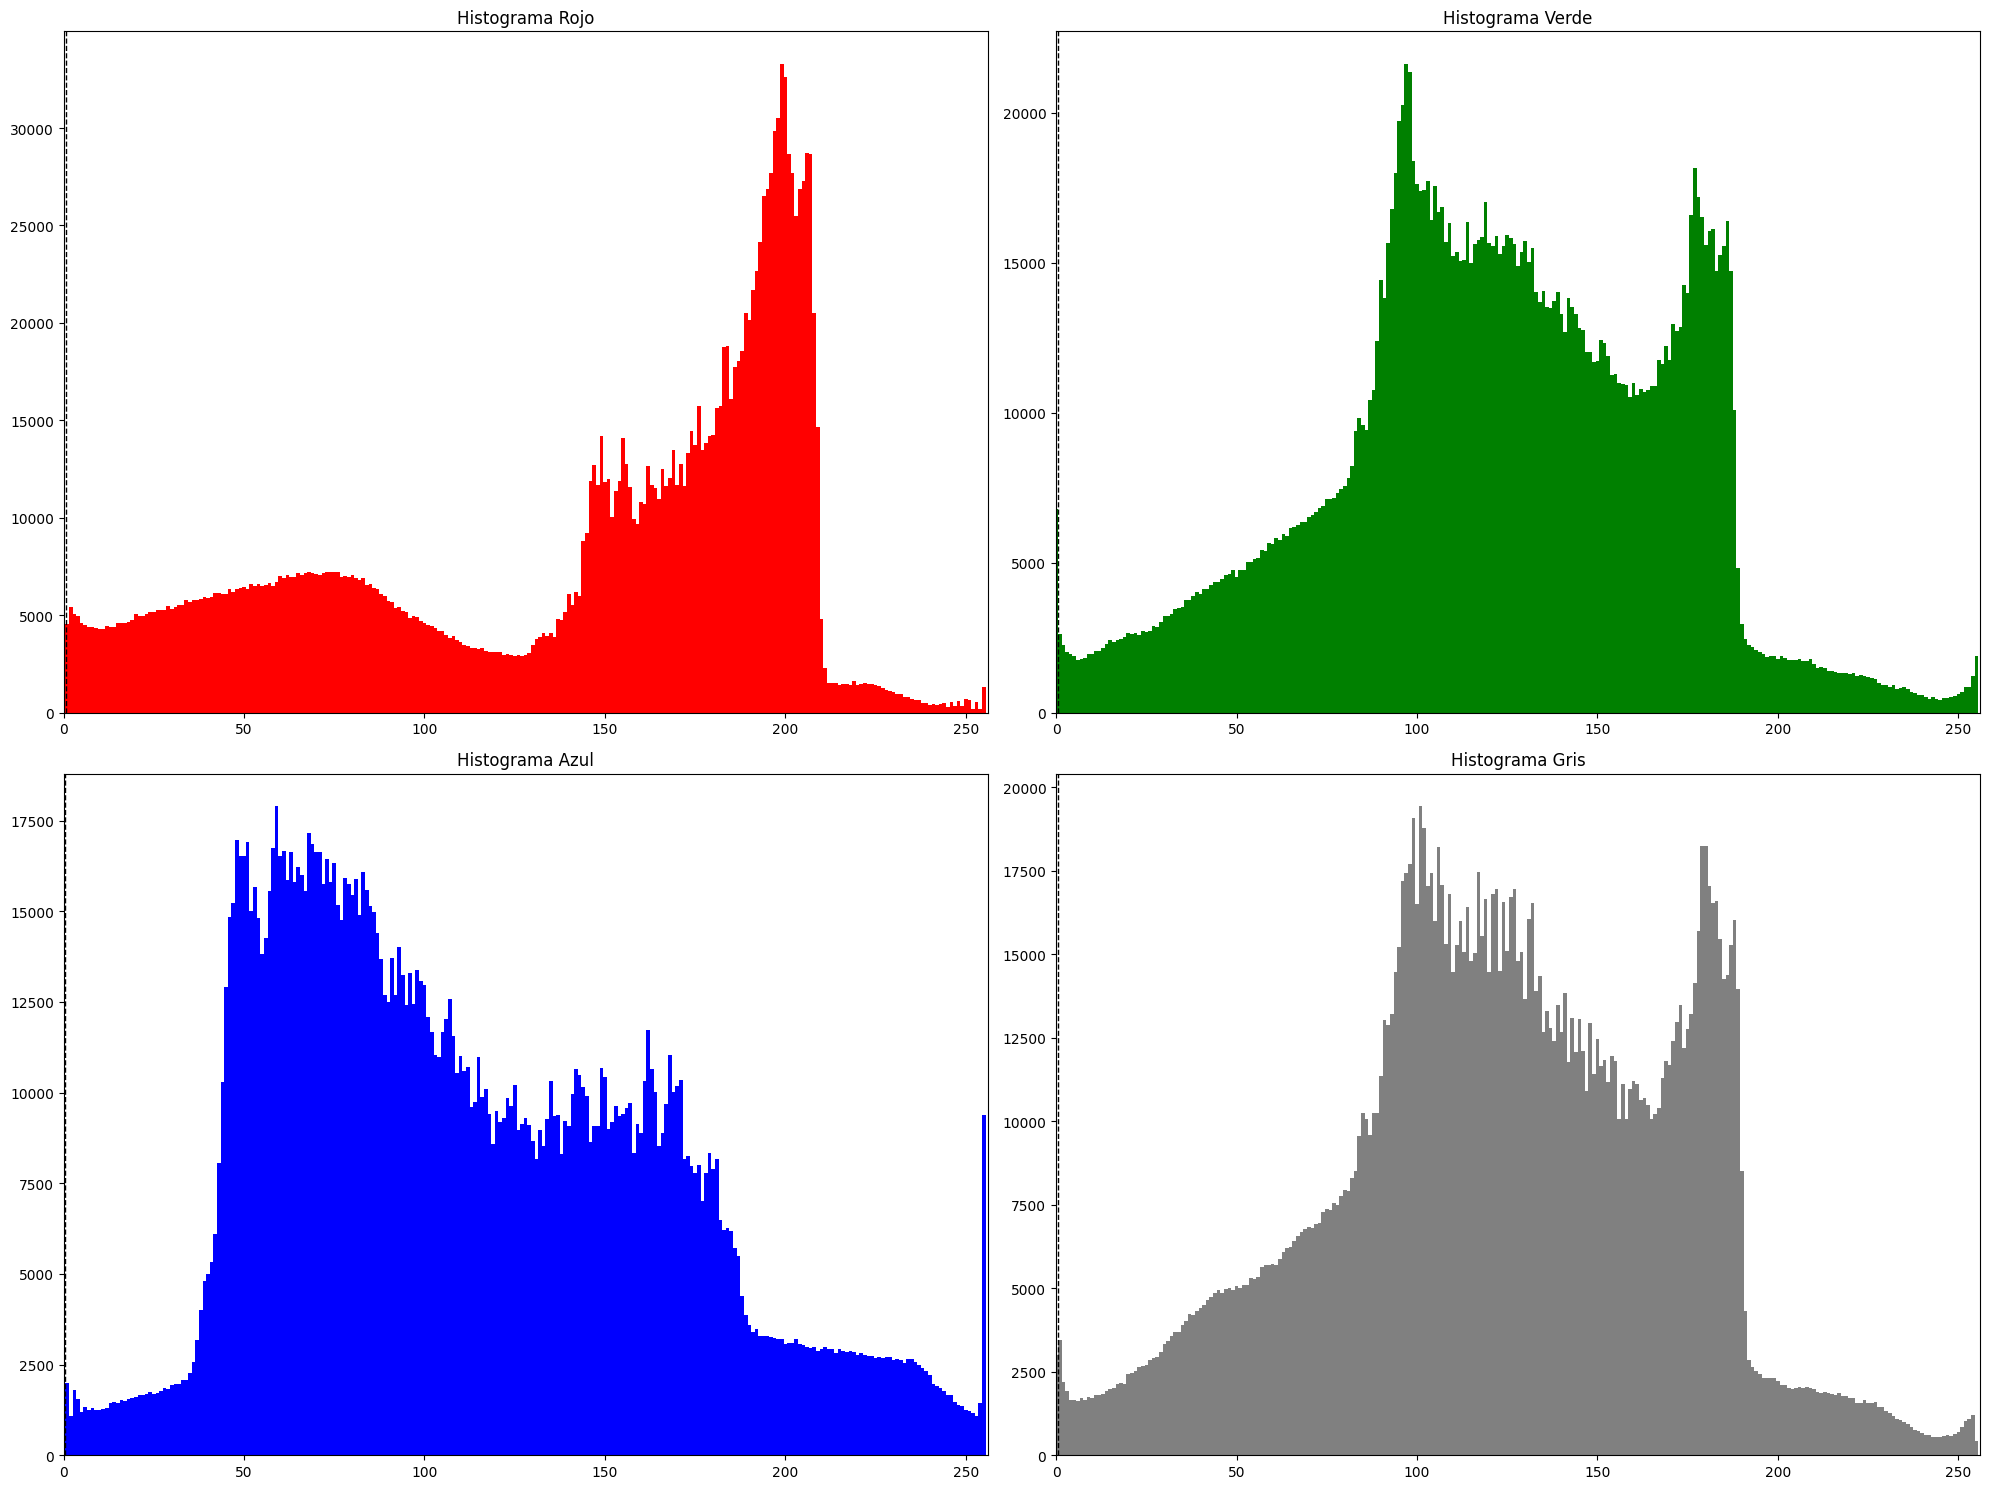

In [111]:
# prueba para los histogramas
image_path = 'paris.jpg'
 # Cargar la imagen a color
image = cv2.imread(image_path)
histogramas(image)

### PROBLEMA 5
Escala de Grises Ponderada
El enfoque de escala de grises ponderada se basa en la idea de que los canales de color RGB (rojo, verde y azul) tienen diferentes contribuciones a la percepción del gris. En lugar de usar un promedio simple, se utilizan ponderaciones para cada canal, ya que la percepción humana de los colores no es uniforme.

In [115]:
#funcion que recibe imagen de color y devuevle una escala de grises utilizando escala de grises ponderada
def escalaGrisPonderado(img):
    alto=img.shape[0]
    ancho=img.shape[1]
    gris=np.zeros((alto,ancho,1)) #escala de grises
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=img[i,j]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            gris[i,j]=int(0.299*red + 0.587*green+0.11*blue)  #esta es la formula para hacer escala de grises ponderada
    return gris


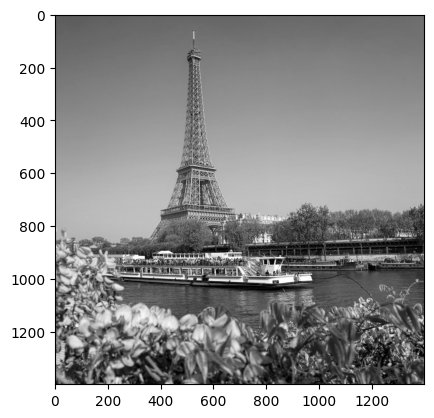

In [118]:
#probando funcion escalaGrisPonderado
img=cv2.imread("paris.jpg")
imgCambiada=escalaGrisPonderado(img)
#imgCambiada=cv2.cvtColor(imgCambiada,cv2.COLOR_BGR2RGB)
plt.imshow(imgCambiada,cmap="gray")
plt.show()


### PROBLEMA 6 ESPACIO DE COLOR HSV

### DESCRIPCION HSV
El espacio de color HSV (Tono, Saturación, Valor), también conocido como HSB (Tono, Saturación, Brillo), es un modelo de representación de color que describe un color en base a tres dimensiones:

1. Tono (H): Representa la posición del color en el espectro visible, como rojo, verde o azul. Se mide en grados, generalmente entre 0° y 360°, donde:
<BR><BR>
0°: Rojo<BR>
60°: Amarillo<BR>
120°: Verde<BR>
180°: Cian<BR>
240°: Azul<BR>
300°: Magenta<BR>
360°: Rojo<BR>
2. Saturación (S): Indica la intensidad o pureza del color. Un valor de saturación alto significa un color vivo, mientras que un valor bajo significa un color grisáceo o descolorido. Se mide como un porcentaje, generalmente entre 0% y 100%, 
donde:<BR>
0%: Blanco (sin color)
100%: Color puro<BR>
3. Valor (V): Representa el brillo o luminosidad del color. Un valor alto significa un color claro, mientras que un valor bajo significa un color oscuro. Se mide como un porcentaje, generalmente entre 0% y 100%, 
donde:<BR>
0%: Negro
100%: Blanco máximo

### Mapeo de colores al espacio HSV

Para mapear un color al espacio HSV, se toman los valores de rojo, verde y azul (componentes del modelo de color RGB) y se convierten a los valores de tono, saturación y valor. Existen diversas fórmulas matemáticas para realizar esta conversión, pero la idea general es la siguiente:

Tono: Se calcula el ángulo en el espectro visible que corresponde al color.

Saturación: Se determina la pureza del color en relación con el color blanco puro.

Valor: Se calcula el brillo del color en relación con el negro puro.

El espacio de color HSV es intuitivo y fácil de usar para la selección y manipulación de colores. Se utiliza ampliamente en aplicaciones de procesamiento de imágenes, diseño gráfico y edición de vídeo.